**Table of contents**<a id='toc0_'></a>    
- 1. [《Python deep learning》](#toc1_)    
- 2. [Brief history of Machine Learning](#toc2_)    
  - 2.1. [Probabilistic modeling](#toc2_1_)    
  - 2.2. [早期神经网络](#toc2_2_)    
  - 2.3. [核方法](#toc2_3_)    
  - 2.4. [决策树、随机森林与梯度提升机](#toc2_4_)    
  - 2.5. [深度学习有何不同](#toc2_5_)    
  - 2.6. [为什么是深度学习，为什么是现在](#toc2_6_)    
- 3. [神经网络的数学基础](#toc3_)    
  - 3.1. [一个案例-识别手写数字，先熟悉熟悉](#toc3_1_)    
  - 3.2. [张量](#toc3_2_)    
    - 3.2.1. [概念](#toc3_2_1_)    
    - 3.2.2. [张量的三个属性](#toc3_2_2_)    
  - 3.3. [张量运算（在numpy中）](#toc3_3_)    
  - 3.4. [梯度运算（优化）](#toc3_4_)    
- 4. [神经网络入门](#toc4_)    
  - 4.1. [电影评论分类：二分类问题](#toc4_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[《Python deep learning》](#toc0_)
---  
Artifical intelligence -> Machine learning -> Deep learning

# 2. <a id='toc2_'></a>[Brief history of Machine Learning](#toc0_)

## 2.1. <a id='toc2_1_'></a>[Probabilistic modeling](#toc0_)

- 朴素贝叶斯算法是一类基于应用贝叶斯定理的机器学习分类器，它假设输入数据的特征都是独立的。这是一个很强的假设，或者说“朴素的”假设，其名称正来源于此。
- 是 logistic 回归（logistic regression，简称 logreg），它有时被认为是现代机器学习的“hello world”。不要被它的名称所误导——logreg 是一种分类算法，而不是回归算法。

## 2.2. <a id='toc2_2_'></a>[早期神经网络](#toc0_)

## 2.3. <a id='toc2_3_'></a>[核方法](#toc0_)

## 2.4. <a id='toc2_4_'></a>[决策树、随机森林与梯度提升机](#toc0_)

## 2.5. <a id='toc2_5_'></a>[深度学习有何不同](#toc0_)

- 不用做特征工程
- 利用深度学习，你可以一次性学习所有特征，而无须自己手动设计。这极大地简化了机器学习工作流程，通常将复杂的多阶段流程替换为一个简单的、端到端的深度学习模型。

## 2.6. <a id='toc2_6_'></a>[为什么是深度学习，为什么是现在](#toc0_)

总的来说，三种技术力量在推动着机器学习的进步：
- 硬件：在 20 世纪前十年里，NVIDIA 和 AMD 等公司投资数十亿美元来开发快速的大规模并行芯片（图形处理器，GPU）。
- 数据：互联网的兴起，它使得收集与分发用于机器学习的超大型数据集变得可行。
- 算法：只有这些改进可以训练 10 层以上的模型时，深度学习才开始大放异彩。

# 3. <a id='toc3_'></a>[神经网络的数学基础](#toc0_)

## 3.1. <a id='toc3_1_'></a>[一个案例-识别手写数字，先熟悉熟悉](#toc0_)

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

- 下面我们来**构建网络**

In [2]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
# 本例中的网络包含 2 个 Dense 层，它们是密集连接（也叫全连接）的神经层。第二层（也
# 是最后一层）是一个 10 路 softmax 层，它将返回一个由 10 个概率值（总和为 1）组成的数组。
# 每个概率值表示当前数字图像属于 10 个数字类别中某一个的概率。

- 要想**训练网络**，我们还需要选择**编译**（compile）步骤的三个参数。
- 损失函数（loss function）：网络如何衡量在训练数据上的性能，即网络如何朝着正确的方向前进。
- 优化器（optimizer）：基于训练数据和损失函数来更新网络的机制。
- 在训练和测试过程中需要监控的指标（metric）：本例只关心精度，即正确分类的图像所占的比例

In [4]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# 准备图像数据
# 在开始训练之前，我们将对数据进行预处理，将其变换为网络要求的形状，并缩放到所
# 有值都在 [0, 1] 区间。比如，之前训练图像保存在一个 uint8 类型的数组中，其形状为
# (60000, 28, 28)，取值区间为 [0, 255]。我们需要将其变换为一个 float32 数组，其形
# 状为 (60000, 28 * 28)，取值范围为 0~1。
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
# 准备标签
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# 开始训练/拟合(fit)
network.fit(train_images, train_labels, epochs=5, batch_size=128) 
#训练过程中显示了两个数字：一个是网络在训练数据上的损失（loss），另一个是网络在训练数据上的精度（acc）。

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2574 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1062 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0699 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0514 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0383 - accuracy: 0.9883


- 验证

In [6]:
test_loss, test_acc = network.evaluate(test_images, test_labels);  print('test_acc:', test_acc)
# 测试集精度为 97.8%，比训练集精度低不少。训练精度和测试精度之间的这种差距是过拟合（overfit）造成的。过拟合是指机器学习模型在新数据上的性能往往比在训练数据上要差。

313/313 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9765
test_acc: 0.9764999747276306


- 第一个例子到这里就结束了。你刚刚看到了如何构建和训练一个神经网络，用不到 20 行的
Python 代码对手写数字进行分类。下一章会详细介绍这个例子中的每一个步骤，并讲解其背后
的原理。接下来你将要学到
  -    张量（输入网络的数据存储对象）、
  -    张量运算（层的组成要素）和
  -    梯度下降（可以让网络从训练样本中进行学习）

## 3.2. <a id='toc3_2_'></a>[张量](#toc0_)

### 3.2.1. <a id='toc3_2_1_'></a>[概念](#toc0_)

- 标量（0D 张量）：仅包含一个数字的张量叫作标量（scalar，也叫标量张量、零维张量、0D 张量）。
- 向量（1D 张量）：数字组成的数组叫作向量（vector）或一维张量（1D 张量）。一维张量只有一个轴。
- 矩阵（2D 张量）：向量组成的数组叫作矩阵（matrix）或二维张量（2D 张量）。矩阵有 2 个轴（通常叫作行和列）。
- 3D 张量与更高维张量

### 3.2.2. <a id='toc3_2_2_'></a>[张量的三个属性](#toc0_)

- 轴的个数（阶）。例如，3D 张量有 3 个轴，矩阵有 2 个轴。这在 Numpy 等 Python 库中也叫张量的 ndim。
- 形状。这是一个整数元组，表示张量沿每个轴的维度大小（元素个数）。例如，前面矩阵示例的形状为 (3, 5)，3D 张量示例的形状为 (3, 3, 5)。向量的形状只包含一个元素，比如 (5,)，而标量的形状为空，即 ()。
- 数据类型（在 Python 库中通常叫作 dtype）。这是张量中所包含数据的类型，例如，张
量的类型可以是 float32、uint8、float64 等。在极少数情况下，你可能会遇到字符
（char）张量。注意，Numpy（以及大多数其他库）中不存在字符串张量，因为张量存
储在预先分配的连续内存段中，而字符串的长度是可变的，无法用这种方式存储。

维度 3
形状 (60000, 28, 28)
数据类型 uint8


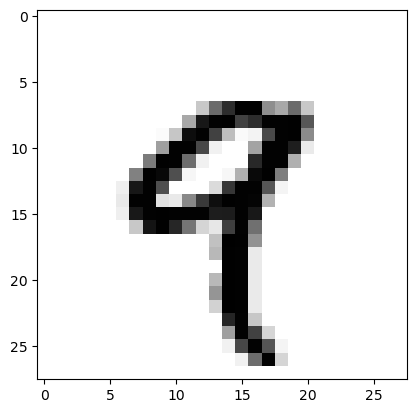

In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('维度：',train_images.ndim)
print('形状：',train_images.shape)
print('数据类型：',train_images.dtype)
# 所以，这里 train_images 是一个由 8 位整数组成的 3D 张量。更确切地说，它是 60000
# 个矩阵组成的数组，每个矩阵由 28×28 个整数组成。每个这样的矩阵都是一张灰度图像，元素
# 取值范围为 0~255。
# 显示第 4 个数字
digit = train_images[4]
# print(digit)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 3.3. <a id='toc3_3_'></a>[张量运算（在numpy中）](#toc0_)

## 3.4. <a id='toc3_4_'></a>[梯度运算（优化）](#toc0_)

# 4. <a id='toc4_'></a>[神经网络入门](#toc0_)

前面几章介绍过，训练神经网络主要围绕以下四个方面。
- 层，多个层组合成网络（或模型）。
- 输入数据和相应的目标。
- 损失函数，即用于学习的反馈信号。
- 优化器，决定学习过程如何进行。

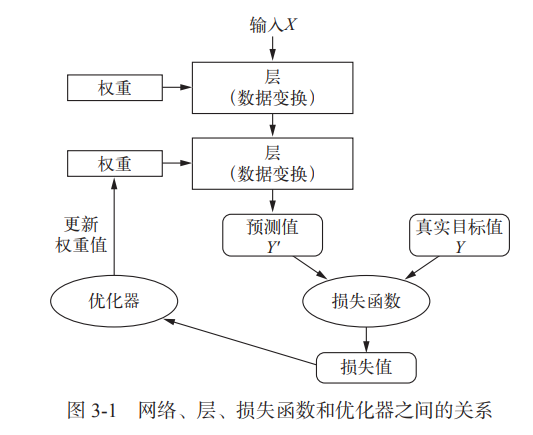  
多个**层**链接在一起组成了**网络**，将输入数据映射为预测值。  
然后损失函数将这些预测值与目标进行比较，得到**损失值**，用于衡量网络预测值与预期结果的匹配程度。  
优化器使用这个损失值来**更新网络的权重**。

## 4.1. <a id='toc4_1_'></a>[电影评论分类：二分类问题](#toc0_)

In [9]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

In [13]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
